In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("creditcard.csv")

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

print("\nClass distribution:\n", df['Class'].value_counts())


Dataset shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0

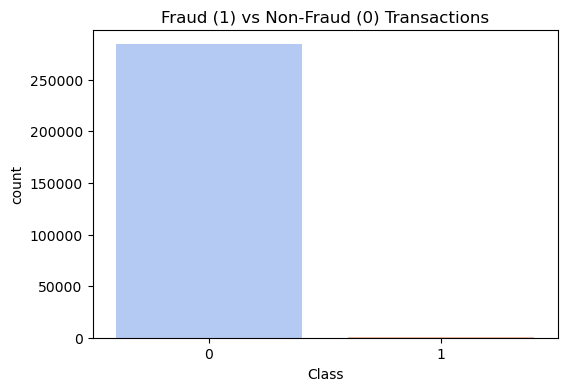


Class Distribution (Percentage):
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


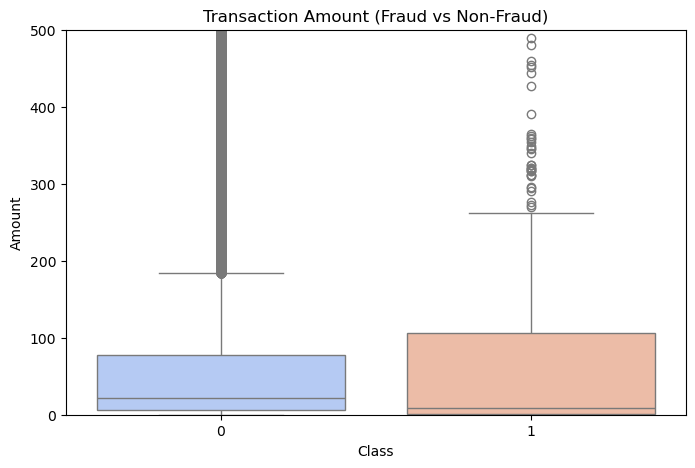

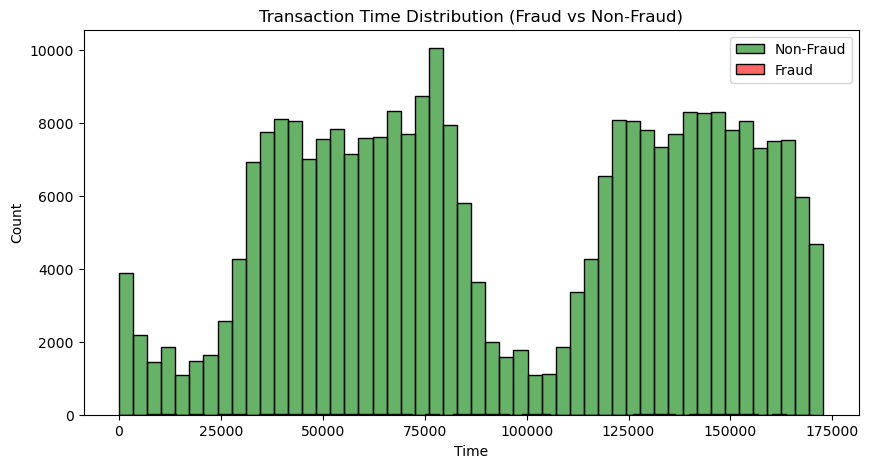

In [3]:

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette="coolwarm")
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")
plt.show()

fraud_count = df['Class'].value_counts()
print("\nClass Distribution (Percentage):")
print((fraud_count / len(df)) * 100)

plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df, palette="coolwarm")
plt.ylim(0, 500)  
plt.title("Transaction Amount (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color="green", label="Non-Fraud", alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color="red", label="Fraud", alpha=0.6)
plt.legend()
plt.title("Transaction Time Distribution (Fraud vs Non-Fraud)")
plt.show()


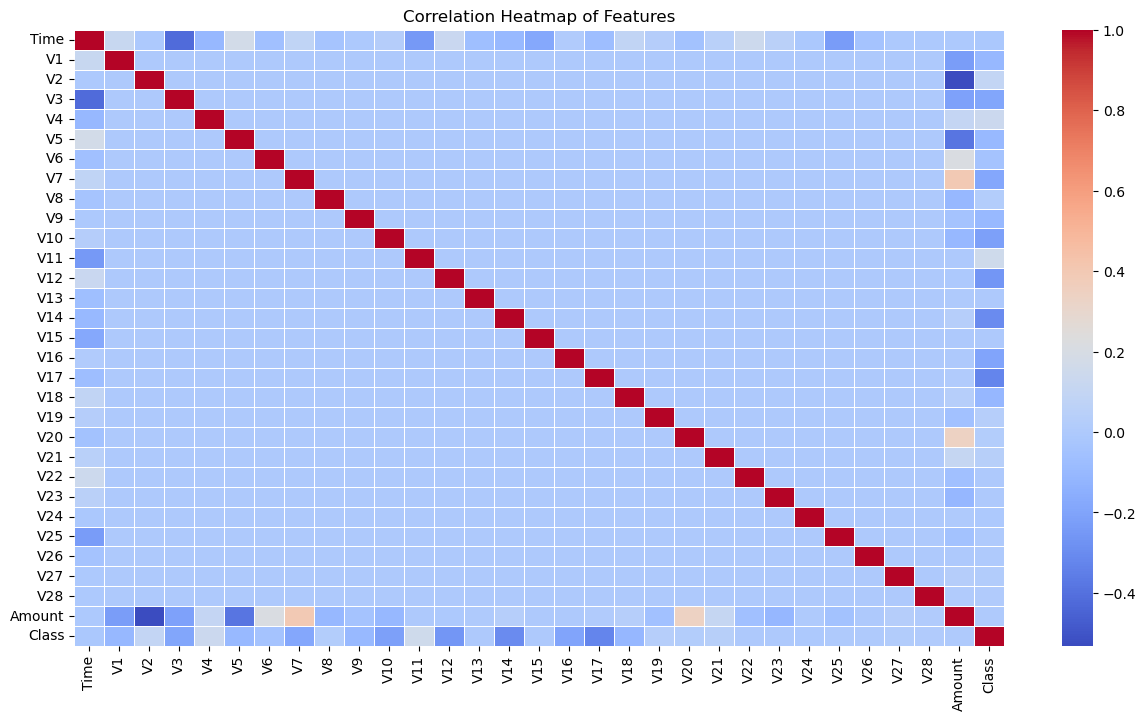


Mean value comparison (first 10 features):

      Non-Fraud Mean    Fraud Mean
Time    94838.202258  80746.806911
V1          0.008258     -4.771948
V2         -0.006271      3.623778
V3          0.012171     -7.033281
V4         -0.007860      4.542029
V5          0.005453     -3.151225
V6          0.002419     -1.397737
V7          0.009637     -5.568731
V8         -0.000987      0.570636
V9          0.004467     -2.581123


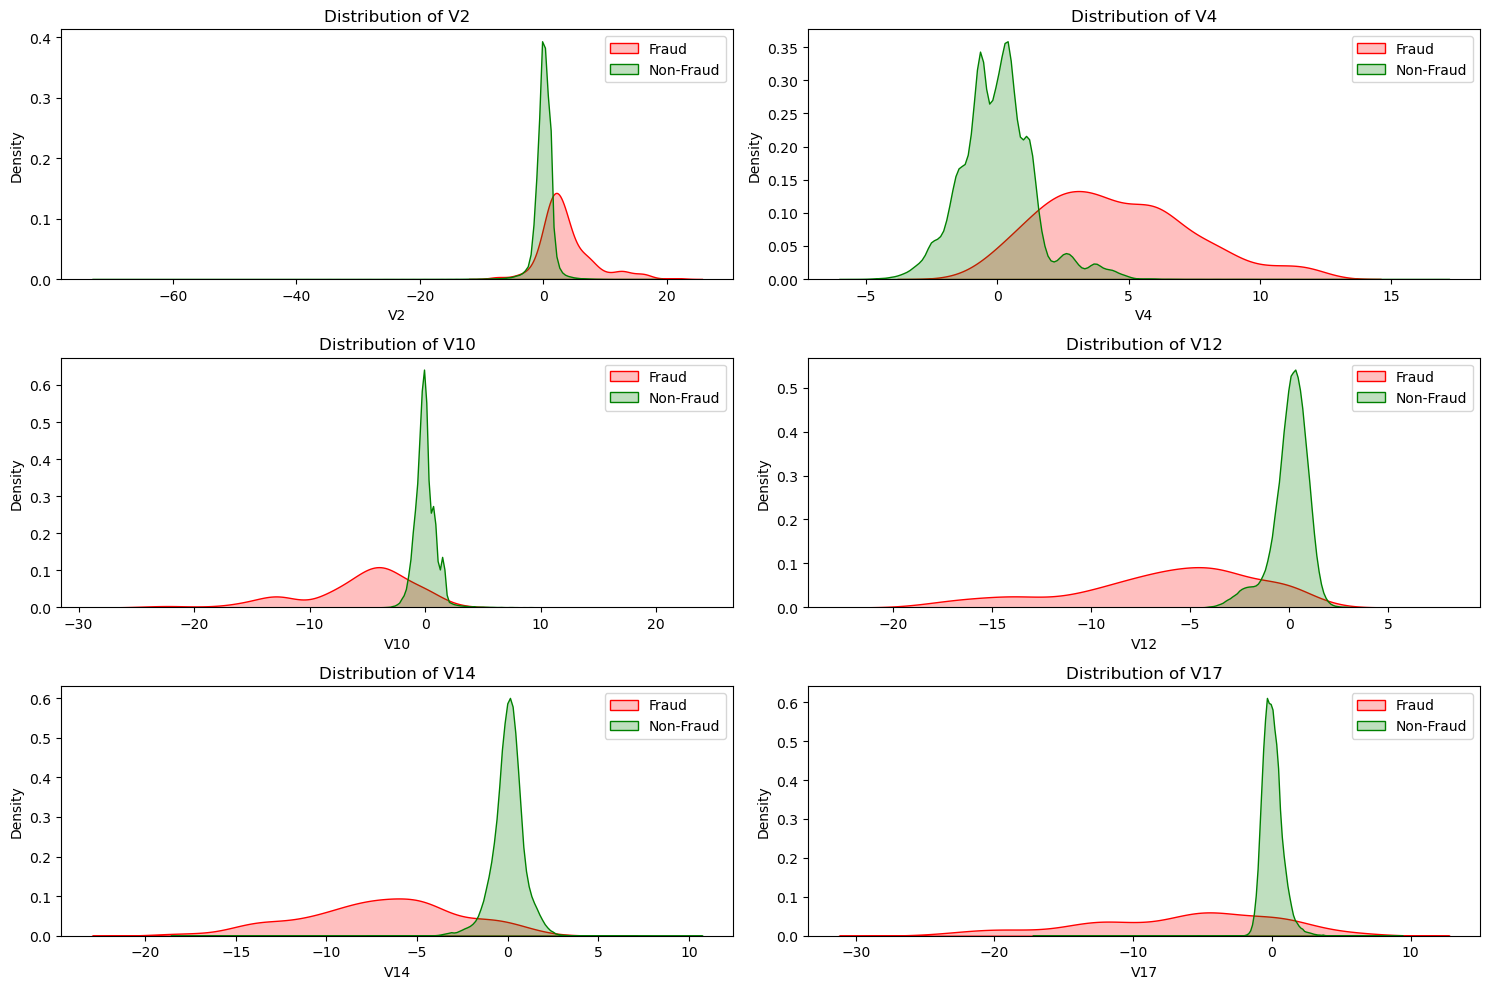

In [4]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

feature_means = pd.DataFrame({
    "Non-Fraud Mean": non_fraud.mean(),
    "Fraud Mean": fraud.mean()
})

print("\nMean value comparison (first 10 features):\n")
print(feature_means.head(10))

important_features = ['V2', 'V4', 'V10', 'V12', 'V14', 'V17']
plt.figure(figsize=(15,10))
for i, col in enumerate(important_features, 1):
    plt.subplot(3,2,i)
    sns.kdeplot(fraud[col], label="Fraud", color="red", shade=True)
    sns.kdeplot(non_fraud[col], label="Non-Fraud", color="green", shade=True)
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Fraud ratio in train set:", y_train.mean())
print("Fraud ratio in test set:", y_test.mean())


Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Fraud ratio in train set: 0.001729245759178389
Fraud ratio in test set: 0.0017204452090867595


Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



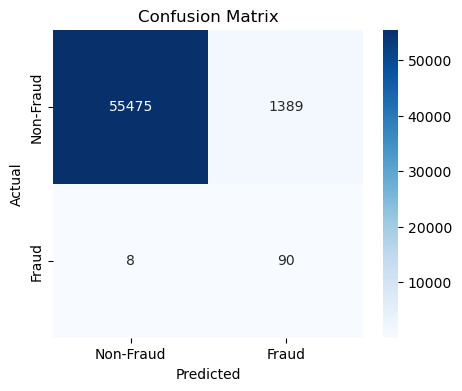

ROC-AUC Score: 0.9721669425367221


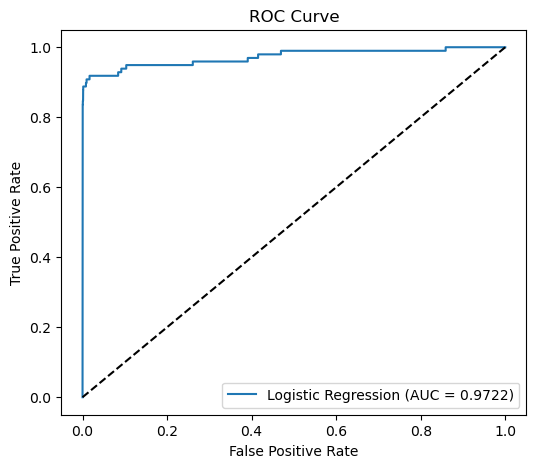

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud","Fraud"], yticklabels=["Non-Fraud","Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962



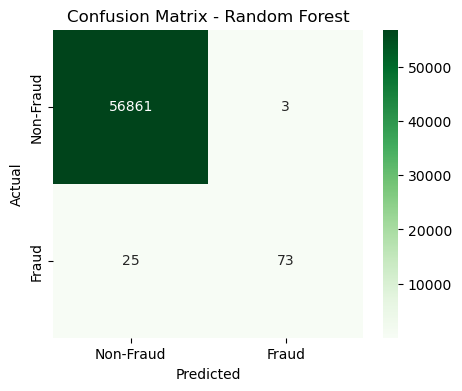

ROC-AUC Score (Random Forest): 0.952908497036969


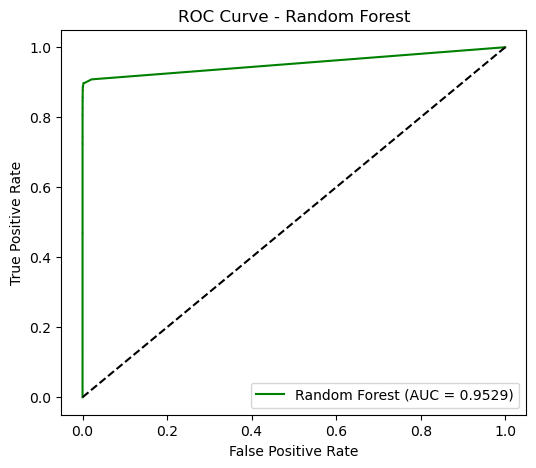

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf, digits=4))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Fraud","Fraud"], yticklabels=["Non-Fraud","Fraud"])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score (Random Forest):", roc_auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})", color="green")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


Classification Report (XGBoost):

              precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     56864
           1     0.7727    0.8673    0.8173        98

    accuracy                         0.9993     56962
   macro avg     0.8862    0.9335    0.9085     56962
weighted avg     0.9994    0.9993    0.9994     56962



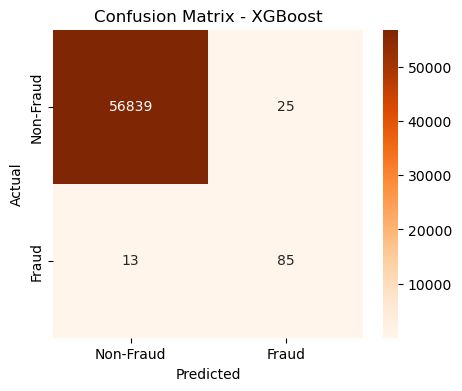

ROC-AUC Score (XGBoost): 0.980753577457995


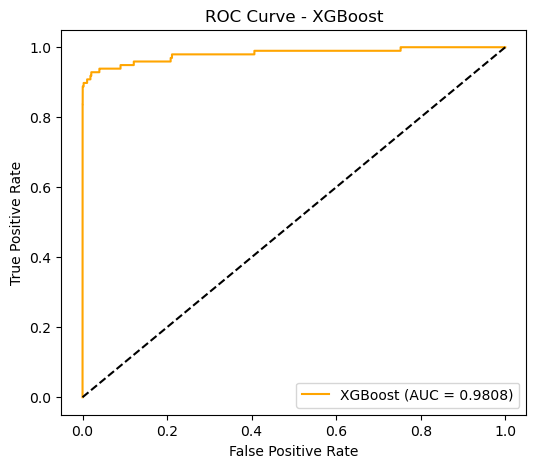

In [8]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),  # handle imbalance
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb, digits=4))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Fraud","Fraud"], yticklabels=["Non-Fraud","Fraud"])
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC Score (XGBoost):", roc_auc_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.4f})", color="orange")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

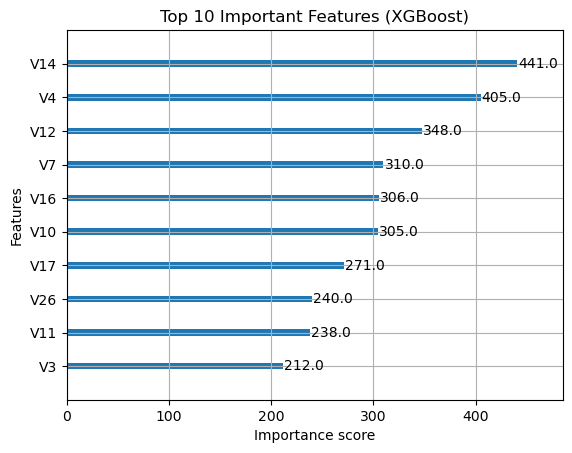

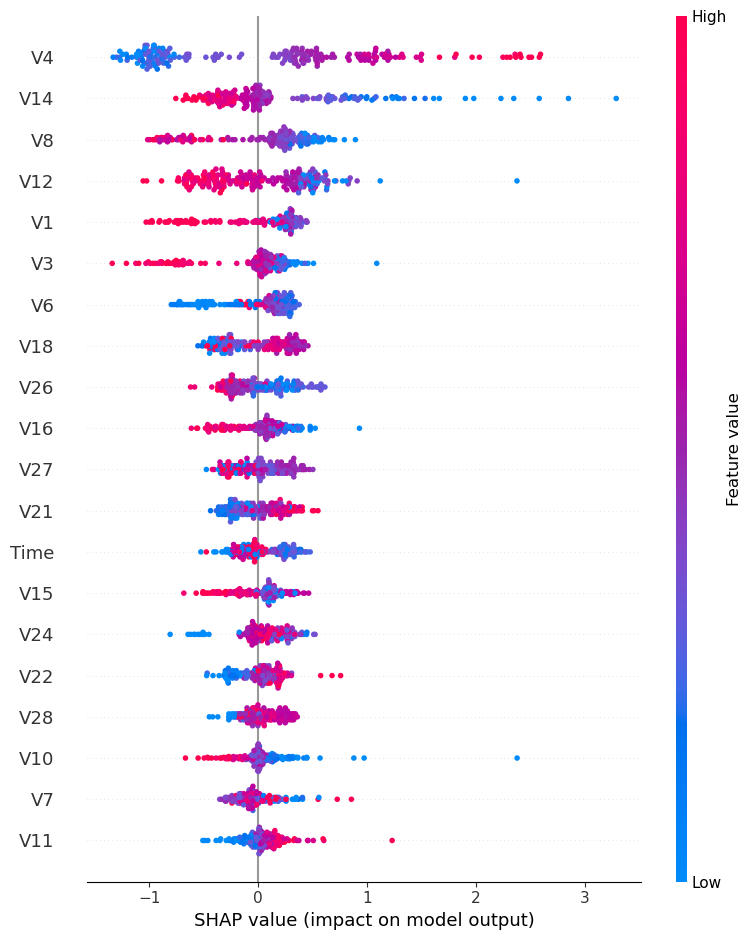

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
shap.initjs()

plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test[:200])

shap.summary_plot(shap_values, X_test[:200])

shap.plots.force(shap_values[0])


Average Precision Score: 0.8741371357000024


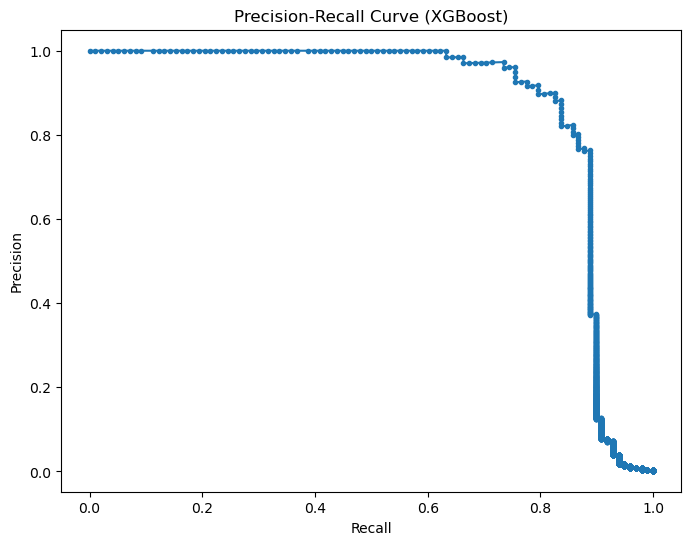


Classification Report with threshold = 0.3
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9996     56864
           1     0.6960    0.8878    0.7803        98

    accuracy                         0.9991     56962
   macro avg     0.8479    0.9435    0.8899     56962
weighted avg     0.9993    0.9991    0.9992     56962



In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = xgb_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

ap_score = average_precision_score(y_test, y_proba)
print("Average Precision Score:", ap_score)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost)")
plt.show()

custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print("\nClassification Report with threshold =", custom_threshold)
print(classification_report(y_test, y_pred_custom, digits=4))


In [12]:
import joblib

joblib.dump(xgb_model, "fraud_detection_xgb.pkl")

loaded_model = joblib.load("fraud_detection_xgb.pkl")
print("Model loaded and ready for deployment!")


Model loaded and ready for deployment!
